# Intro to Machine Learning in Python

Learn how to get started training Neural Networks with keras


# Warning 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Mauritius_Road_Signs_-_Warning_Sign_-_Other_dangers.svg/556px-Mauritius_Road_Signs_-_Warning_Sign_-_Other_dangers.svg.png" style="width:50px">

It's actually pretty easy to get started training Machine learning algorithms, but be aware there are plenty of examples of well trained, well coded, and well intentioned ML algorithms that do harmful things.


<a href="https://www.technologyreview.com/s/613274/facebook-algorithm-discriminates-ai-bias"> Facebook’s ad-serving algorithm discriminates by gender and race
 </a>
    
<a href="https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G"> Amazon scraps secret AI recruiting tool that showed bias against women
 </a>

<a href="https://www.thedailybeast.com/why-doctors-arent-afraid-of-better-more-efficient-ai-diagnosing-cancer"> Ruler in picture an indicator for Cancer </a>

<a href="https://www.theverge.com/2016/3/24/11297050/tay-microsoft-chatbot-racist"> Twitter taught Microsoft’s AI chatbot to be a racist asshole in less than a day </a>

Be aware and careful before you deploy.


<img src="https://s3.ap-south-1.amazonaws.com/techleer/207.jpg">

# Vocab
## Artificial Intelligence
An all encompassing term for a broad field the most promising of which is currently machine learning
    
## Machine Learning
* Deep Learning - Deep Neural Networks of all forms
* ‘Traditional’ Machine Learning  - Pretty much everything else
    Trees, SVMs, Linear Regression, Naive Bayes...
* **X’s = Input variables**
* **Y’s = Target Variables**
* Loss function - Numerical Goal of the Model


# Machine Learning
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  
* **Important Note: No prediction of causality** 
* Function outputs and targets can be stochastic 


# Outline
* Dense (Fully Connected Neural Networks)
  * Example Fits
* Sequences and Recurrent Neural Networks
  * Learning to Count
* Sentiment Analysis on movie reviews

# Packages

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Machine learning algorithms all start form a series data examples


# Input Data
* **numpy arrays** 
* pandas dataframes
* hdf5, etc
* **shape = (examples x data dimentions)** 
    * RGB Image Dataset (Number of images x Height x Width x 3) *(3=RGB)
    * Text (Text blocks x ? ) examples with varying length can have an unspecified dimension size
        * When training each batch needs to be the same length
* Divide into 2 or 3 splits
  * 2 Training/Testing (one for training and one for checking for over-fitting)
  * 3 Training/Development/Testing 
      * One for training, one for checking for over-fitting (Development) )
      * One for testing performance, but not for making any modeling decisions
          * i.e. in this case testing is the data you want the model to actually work with  
          

          

# Our first Layer
A Dense or fully connected layer

<img src="../assets/dense.png">

A dense layer has a connection between every input variable and every output node. Each connection is represented by a weight $W_{i,n}$ from and input $X_n$ to an output $O_i$. The output is a sum over all the input variables times there weights plus a bias $B_i$
<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

We will need to fit this to data, which means finding the best values for $W_{i,n}$ and $B_i$ to approximate our data.


In [88]:
# Lets start with a simple prediction a straight Line
data_dim=5

X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return 2*X[:,0]+1 #Ignore all other input have the output only depend on the first dimention
Y=func(X)




    
    

In [89]:
# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
model=tf.keras.models.Model(input_layer,output_layer)

#MSE= Mean Squared Error 
model.compile(loss='mse',optimizer='adam')

# Fit Our Simple Neural Network
# Stop fitting when the validation loss stops improving
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#Fit
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us




Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 3s 561us/step - loss: 63.4659 - val_loss: 41.2641
Epoch 2/100
5000/5000 [==============================] - 1s 165us/step - loss: 30.5968 - val_loss: 22.5257
Epoch 3/100
5000/5000 [==============================] - 1s 168us/step - loss: 19.4594 - val_loss: 16.8122
Epoch 4/100
5000/5000 [==============================] - 1s 172us/step - loss: 15.9096 - val_loss: 14.5414
Epoch 5/100
5000/5000 [==============================] - 1s 168us/step - loss: 13.9296 - val_loss: 12.7540
Epoch 6/100
5000/5000 [==============================] - 1s 160us/step - loss: 12.1540 - val_loss: 11.0477
Epoch 7/100
5000/5000 [==============================] - 1s 169us/step - loss: 10.4548 - val_loss: 9.4267
Epoch 8/100
5000/5000 [==============================] - 1s 174us/step - loss: 8.8592 - val_loss: 7.9268
Epoch 9/100
5000/5000 [==============================] - 1s 170us/step - loss: 7.3932 - val_loss: 6

Epoch 76/100
5000/5000 [==============================] - 1s 173us/step - loss: 1.0535e-11 - val_loss: 7.6694e-12
Epoch 77/100
5000/5000 [==============================] - 1s 165us/step - loss: 7.5813e-12 - val_loss: 6.7169e-12
Epoch 78/100
5000/5000 [==============================] - 1s 161us/step - loss: 6.4616e-12 - val_loss: 6.2074e-12
Epoch 79/100
5000/5000 [==============================] - 1s 170us/step - loss: 6.8350e-12 - val_loss: 5.9069e-12
Epoch 80/100
5000/5000 [==============================] - 1s 167us/step - loss: 5.1715e-12 - val_loss: 4.9490e-12
Epoch 81/100
5000/5000 [==============================] - 1s 170us/step - loss: 4.6298e-12 - val_loss: 4.8386e-12
Epoch 82/100
5000/5000 [==============================] - 1s 163us/step - loss: 3.4486e-12 - val_loss: 1.8550e-12
Epoch 83/100
5000/5000 [==============================] - 1s 169us/step - loss: 1.2456e-12 - val_loss: 1.2269e-12
Epoch 84/100
5000/5000 [==============================] - 1s 164us/step - loss: 2.1513e-

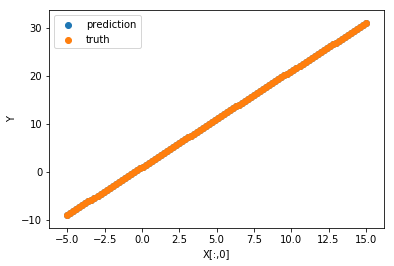

In [91]:
X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()



We can look at a models weights

In [96]:
weights=model.get_weights()
print(len(weights))
print(weights[0].shape,weights[1].shape)

print(weights[0])



2
(5, 1) (1,)
[[ 2.0000000e+00]
 [ 1.2722031e-08]
 [ 2.5370291e-08]
 [-5.1710254e-09]
 [ 2.6714067e-08]]


We expect $W_{0,0}$=2, and $B_0$=1

In [103]:
print("W=",weights[0])
print("W[0,0]=",weights[0][0,0])
print("B=",weights[1])


W= [[ 2.0000000e+00]
 [ 1.2722031e-08]
 [ 2.5370291e-08]
 [-5.1710254e-09]
 [ 2.6714067e-08]]
W[0,0]= 2.0
B= [0.9999999]


Lets try something a bit more complicated a sin wave

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 177us/step - loss: 50.3590 - val_loss: 30.9382
Epoch 2/100
5000/5000 [==============================] - 1s 131us/step - loss: 20.4459 - val_loss: 14.3333
Epoch 3/100
5000/5000 [==============================] - 1s 129us/step - loss: 11.2296 - val_loss: 9.7768
Epoch 4/100
5000/5000 [==============================] - 1s 124us/step - loss: 8.6132 - val_loss: 8.0730
Epoch 5/100
5000/5000 [==============================] - 1s 130us/step - loss: 7.2525 - val_loss: 6.8131
Epoch 6/100
5000/5000 [==============================] - 1s 131us/step - loss: 6.0812 - val_loss: 5.6644
Epoch 7/100
5000/5000 [==============================] - 1s 125us/step - loss: 5.0062 - val_loss: 4.6146
Epoch 8/100
5000/5000 [==============================] - 1s 129us/step - loss: 4.0528 - val_loss: 3.6992
Epoch 9/100
5000/5000 [==============================] - 1s 129us/step - loss: 3.2301 - val_loss: 2.9274
Ep

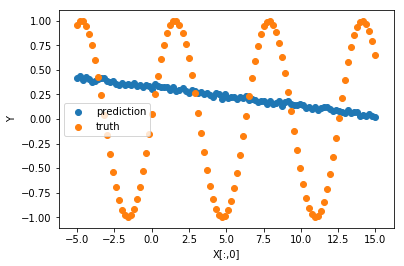

In [15]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.compile(loss='mse',optimizer='adam')
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()



Oops this didn't work. So far what we wrote above can only be linear

<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

we need to add something called an activation function $\sigma$

<p style="text-align: center;">
$O_i = \sigma(\sum_n W_{i,n}*X_n+B_i)$    
</p>

$\sigma$ has to be non-linear and a good choice is a LeakyReLU

<img src='../assets/leakyReLU.png'>

Let's also make our model a bit more powerful, but adding more layers $l$

<p style="text-align: center;">
$O_i,o=X_i$
</p>
 
<p style="text-align: center;">  
$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$    
</p>


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        (None, 5)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 20)                120       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 20)                0         
__________

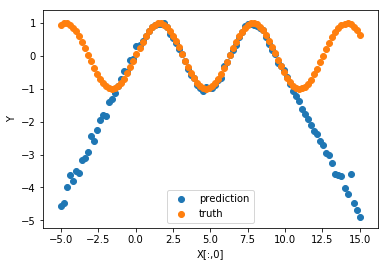

In [105]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)


output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='mse',optimizer='adam')
model.fit(X,Y,epochs=50,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()




The data fits the sin curve perfectly where it had seen training data 0-10, and not so well where there was no training data. Neural networks are universal function approximators, you have little control of what they predict when given data that is completely new. 


# Dense network summary

* Dense networks take fixed length input and have a fixed length output
* Like All Neural Network layers they require an activation function
* They can be stacked to represent more complicated functions
* You're taking your chances when predicting data that's very different from you're training data


# Sequences
A lot of data we have doesn't have a fixed dimension, for example text. To make our predictions we need another kind of layer called a recurrent layer. 

<img src="../assets/rnn.gif">

Recurrent layers step through each data point in a sequence, and output one number at the end (or another sequence)
Examples:
* RNN : First simplest recurrent layer
* LSTM: Long Short Term Memory Networks
* GRU: Gated Recurrent Unit

All of the above are implemented differently with different strengths, but for now lets stick with an LSTM



In [85]:
input_layer=tf.keras.layers.Input((None,1))
print(input_layer)
output_layer=tf.keras.layers.LSTM(1,activation='linear')(input_layer)
model=tf.keras.models.Model([input_layer],[output_layer])
opt=tf.keras.optimizers.Adam(lr=1e-3)

model.compile(loss='mse',optimizer=opt)
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


model.fit(X,Y,validation_split=0.5,epochs=100,callbacks=[es])



Tensor("input_39:0", shape=(?, ?, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 6s 1ms/step - loss: 1081.0467 - val_loss: 1071.3975
Epoch 2/100
5000/5000 [==============================] - 4s 720us/step - loss: 1080.4070 - val_loss: 1069.1196
Epoch 3/100
5000/5000 [==============================] - 4s 719us/step - loss: 1070.3395 - val_loss: 1036.5711
Epoch 4/100
5000/5000 [==============================] - 4s 716us/step - loss: 592.1027 - val_loss: 4.5454
Epo

5000/5000 [==============================] - 4s 727us/step - loss: 0.0071 - val_loss: 0.0062
Epoch 72/100
5000/5000 [==============================] - 4s 715us/step - loss: 0.0085 - val_loss: 0.0056
Epoch 73/100
5000/5000 [==============================] - 4s 711us/step - loss: 0.0079 - val_loss: 0.0110
Epoch 74/100
5000/5000 [==============================] - 4s 703us/step - loss: 0.0068 - val_loss: 0.0057
Epoch 75/100
5000/5000 [==============================] - 4s 729us/step - loss: 0.0084 - val_loss: 0.0049
Epoch 76/100
5000/5000 [==============================] - 4s 719us/step - loss: 0.0066 - val_loss: 0.0081
Epoch 77/100
5000/5000 [==============================] - 4s 719us/step - loss: 0.0069 - val_loss: 0.0043
Epoch 78/100
5000/5000 [==============================] - 4s 715us/step - loss: 0.0067 - val_loss: 0.0133
Epoch 79/100
5000/5000 [==============================] - 4s 720us/step - loss: 0.0077 - val_loss: 0.0150
Epoch 80/100
5000/5000 [==============================] - 4

In [76]:
X=[]
Y=[]
for i in range(10000):
    _dp=[]
    _dp=np.random.randint(50)+np.linspace(0,4,5)
    Y.append(_dp[-1]+1)
    X.append(np.expand_dims(_dp,-1))
X=np.array(X)
Y=np.array(Y)
print(X[0],Y[0])

print(X.shape)




[[22.]
 [23.]
 [24.]
 [25.]
 [26.]] 27.0
(10000, 5, 1)


In [80]:
model.predict(np.expand_dims([[2,3,4,5,6]],-1) )

array([[6.9389105]], dtype=float32)

## Text Data

The coding/research part of most machine learning algorithms is how to utilize data in a way an algorthim understands.

## Goal

Read the raw the raw text from these movie reviews, and predict wether the review is positive or not
* Need to go from an array (1-D unknown length) to a probability (1 number)
* Need to build a series of layers to make that possible



* We will take text that is transformed into an sequence of integers
  * For this data we assign each word (token) in a sentence a unique integer
    * include a token (integer) for unknown, pad, and start

* We will transform the sequence of integers into an sequence of vectors
    * Do this with a new Embedding Layer
* Then use an LSTM layer, and a Dense layer to make a prediction


Array of Ints -> **Embedding** -> Array of Vectors -> **RNN** -> fixed output -> **Dense** -> Probability


In [129]:
# Lets load some input data in the 2-split format
index_from=3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from)


word_2_index={k:(v+index_from) for k,v in tf.keras.datasets.imdb.get_word_index().items()}
word_2_index['<PAD>']=0
word_2_index['<START>']=1
word_2_index['<UNK>']=2

index_2_word={}

for word in word_2_index:
    index_2_word[ word_2_index[word]]=word


In [130]:
check=['this','is','a','sentence']
print(check, [word_2_index[i] for i in check])

['this', 'is', 'a', 'sentence'] [14, 9, 6, 4130]


In [131]:
last_word=np.max(list(word_2_index.values()))

In [132]:
print(x_train.shape)
print(y_train.shape)

print(x_train[0])
print(y_train[0])


print(" ".join([index_2_word[i] for i in x_train[0]]))

print('1 = Positive Review','0 = Negative Review ')
print('label',y_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
<START> this fil

**Note:**
This data has already been 'tokenized' meaning the text has been pre-processed. In this case made lowercase with punctuation removed. There are many different ways of doing this.


In [133]:
input_layer=tf.keras.layers.Input( (None,))
print(input_layer)

Tensor("input_44:0", shape=(?, ?), dtype=float32)


In [134]:
nn=tf.keras.layers.Embedding(last_word,100)(input_layer)
nn=tf.keras.layers.LSTM(10)(nn)
nn=tf.keras.layers.Dense(10)(nn)
nn=tf.keras.layers.LeakyReLU()(nn)
output=tf.keras.layers.Dense(1,activation='sigmoid')(nn)

model=tf.keras.models.Model(input_layer,output)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 100)         8858700   
_________________________________________________________________
lstm_29 (LSTM)               (None, 10)                4440      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 8,863,261
Trainable params: 8,863,261
Non-trainable params: 0
_________________________________________________________________


## Binary Cross Entropy

Our last layer here is using a sigmoid activation, which is bounded between zero and 1

<img src="../assets/sigmoid.png">

The activation on your last layer has to match your loss function in this case 'Binary Cross-Entropy'
<p style="text-align: center;">
$L= -1*\sum_i y_{true,i}*ln(y_{pred,i}) + (1-y_{true,i})*ln(1-y_{pred,i}) $
</p>
Which is minimized when $y_{pred}=y_{true}$


In [135]:
# We need each batch given to the model to have the same size
# For right now we will just make all the data the same size by padding or cropping to a length of 200

x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200, dtype='int32',value=0.0)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200, dtype='int32',value=0.0)



In [136]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=0, mode='auto')
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[es])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 310s 12ms/step - loss: 0.3882 - acc: 0.8226 - val_loss: 0.3458 - val_acc: 0.8571
Epoch 2/10
25000/25000 [==============================] - 302s 12ms/step - loss: 0.1624 - acc: 0.9408 - val_loss: 0.3414 - val_acc: 0.8616
Epoch 3/10
25000/25000 [==============================] - 302s 12ms/step - loss: 0.0706 - acc: 0.9764 - val_loss: 0.4841 - val_acc: 0.8582


In [137]:
def sentence_2_ints(sentence):
    return np.array([[word_2_index[s] for s in sentence.split()]])
    
    

In [138]:
print(model.predict(sentence_2_ints('<START> this movie is the very best i have ever seen') ))

print(model.predict(sentence_2_ints('<START> i have mixed feelings about this movie') ))
print(model.predict(sentence_2_ints('<START> i have mixed feelings about this movie i may like it in the end') ))

print(model.predict(sentence_2_ints('<START> i have never seen a worse film') ))
print(model.predict(sentence_2_ints('<START> hi is this where i google the information') ))

print(model.predict(sentence_2_ints('<START> star trek') ))
print(model.predict(sentence_2_ints('<START> star wars') ))


[[0.90006727]]
[[0.79725325]]
[[0.88183933]]
[[0.05837091]]
[[0.8210077]]
[[0.26951432]]
[[0.34072697]]


# A short Menu of other ML layers
* Convolutional Layers (Conv1D, Conv2D, Conv3D)
    * Input sequences of fixed or varying length best when array values that are close together are correlate i.e pictures
    * Output a new sequence normally lower dimension, but with more channels    
* Recurrent Neural Networks (RNN, LSTM, GRUS)
    * Input sequence
    * Output sequence or a fixed dimensional output    

* Embedding Network
    * A learnable mapping from a large set of integers, to a fixed output
    * Input integer
    * Ouput vector

* Dense Network
    * Fixed Input
    * Fixed Output

* Dropout
    * Good at preventing overfitting